# Лабораторная работа №2

ФИО: Гаркушенко Лев Георгиевич

Группа: БИВТ-22-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [48]:
import pandas
data = pandas.read_csv("apple_quality.csv")
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


## 2. Описание постановки задачи

Нужно спрогнозировать качество товара(quality) по переменным

Переменные:

    - Size(размер)
    - Weight(вес)
    - Sweetness(cладость)
    - Crunchiness(хрусткость)
    - Juiciness(cочность)
    - Ripeness(cпелость)
    - acidity(кислотность)
    
Cводится к тому что целевое событие дискретно, где 0 - bad, а 1 - good

## 3. Распределение целевой переменной доделать

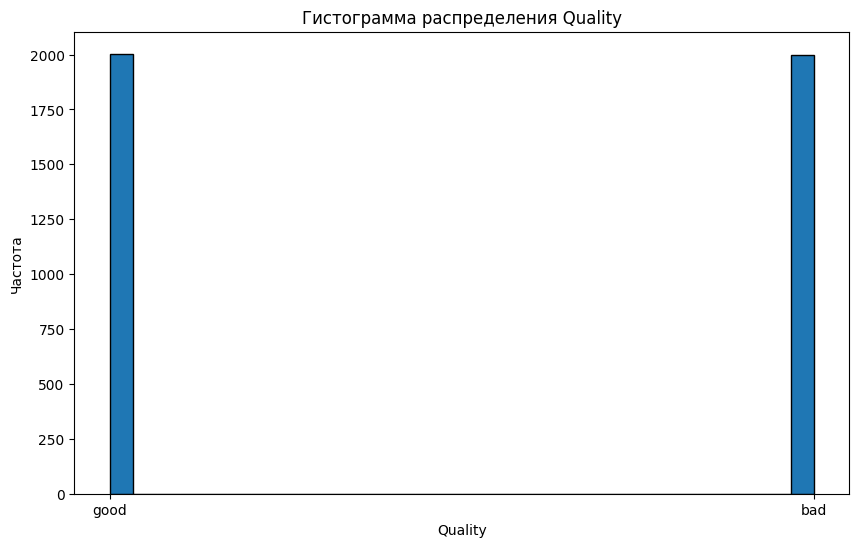

Количество уникальных значений целевой переменной: 2
Уникальные значения и их количества:
Quality
good    2004
bad     1996
Name: count, dtype: int64


In [49]:
import matplotlib.pyplot as plt

# Шаг 2: Построение гистограммы для целевой переменной
target_variable = 'Quality'
#гистограмма
plt.figure(figsize=(10, 6))
data[target_variable].hist(bins=30, edgecolor='black')
plt.title(f'Гистограмма распределения {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Частота')
plt.grid(False)
plt.show()
# Шаг 3: Подсчет количества уникальных значений
unique_values_count = data[target_variable].nunique()
print(f'Количество уникальных значений целевой переменной: {unique_values_count}')

unique_counts = data[target_variable].value_counts(dropna=True)

# Вывод уникальных значений и их количеств
print('Уникальные значения и их количества:')
print(unique_counts)


Распределение значений:
   - Гистограмма показывает, что Quality представлена двумя значениями: good и bad.
   - Эти значения распределены примерно одинаково, что говорит об относительно однородном распределении между классами good и bad.
   - Поскольку частота обоих классов примерно одинакова, можно сделать вывод, что дисбаланса классов в данных нет


## 4. Основные статистики

In [50]:
# Вывод основных статистик
statistics = data.describe()
print(statistics)

              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75% 

## 5. Основная ифнормация

In [51]:
# Вывод основной информации по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


## 6. Количество пропусков

In [53]:
# Подсчет пропусков во всех колонках
missing_values = data.isna().sum()

print("Количество пропусков в каждом столбце:")
print(missing_values)

Количество пропусков в каждом столбце:
A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


## 7. Гистограммы 5 любых признаков

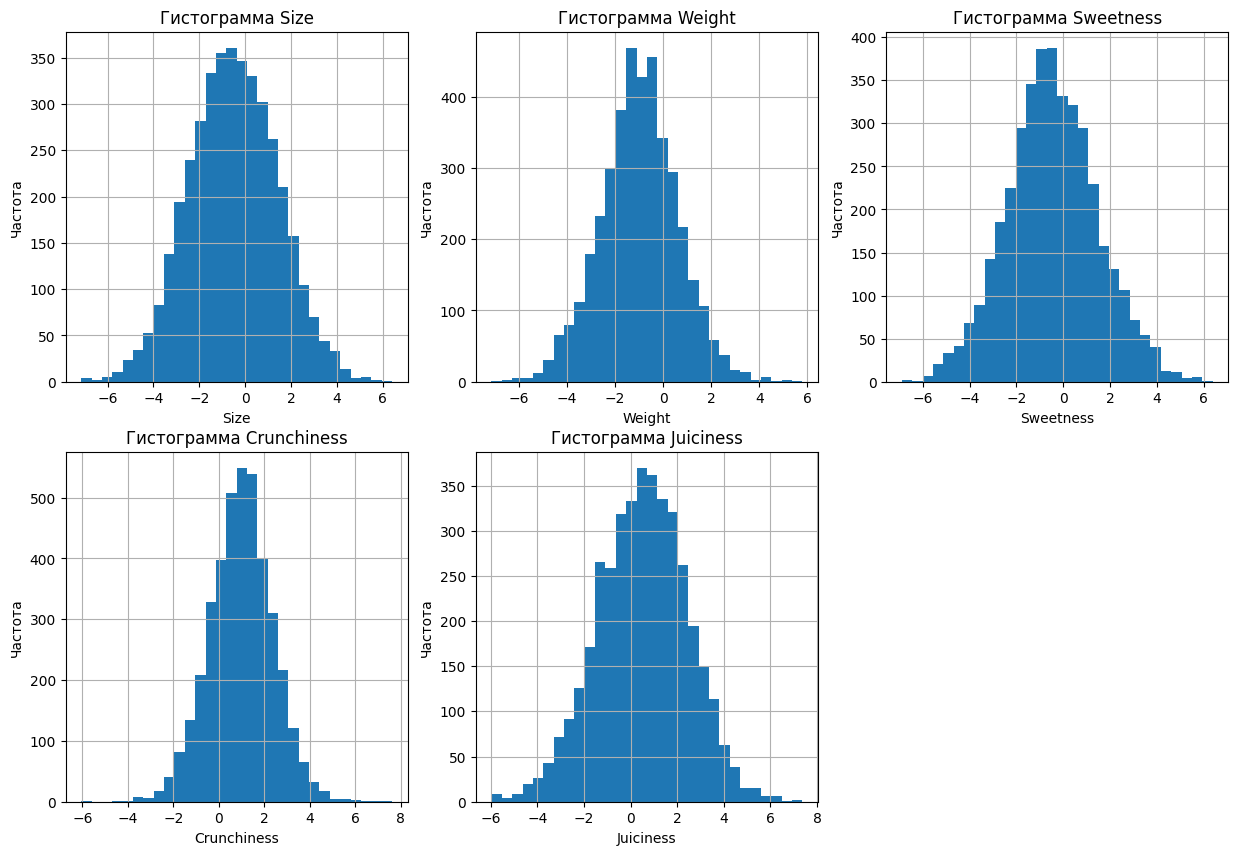

In [54]:
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness']

# Построение гистограмм для каждого признака
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    data[feature].hist(bins=30)
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.show()

## 8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной

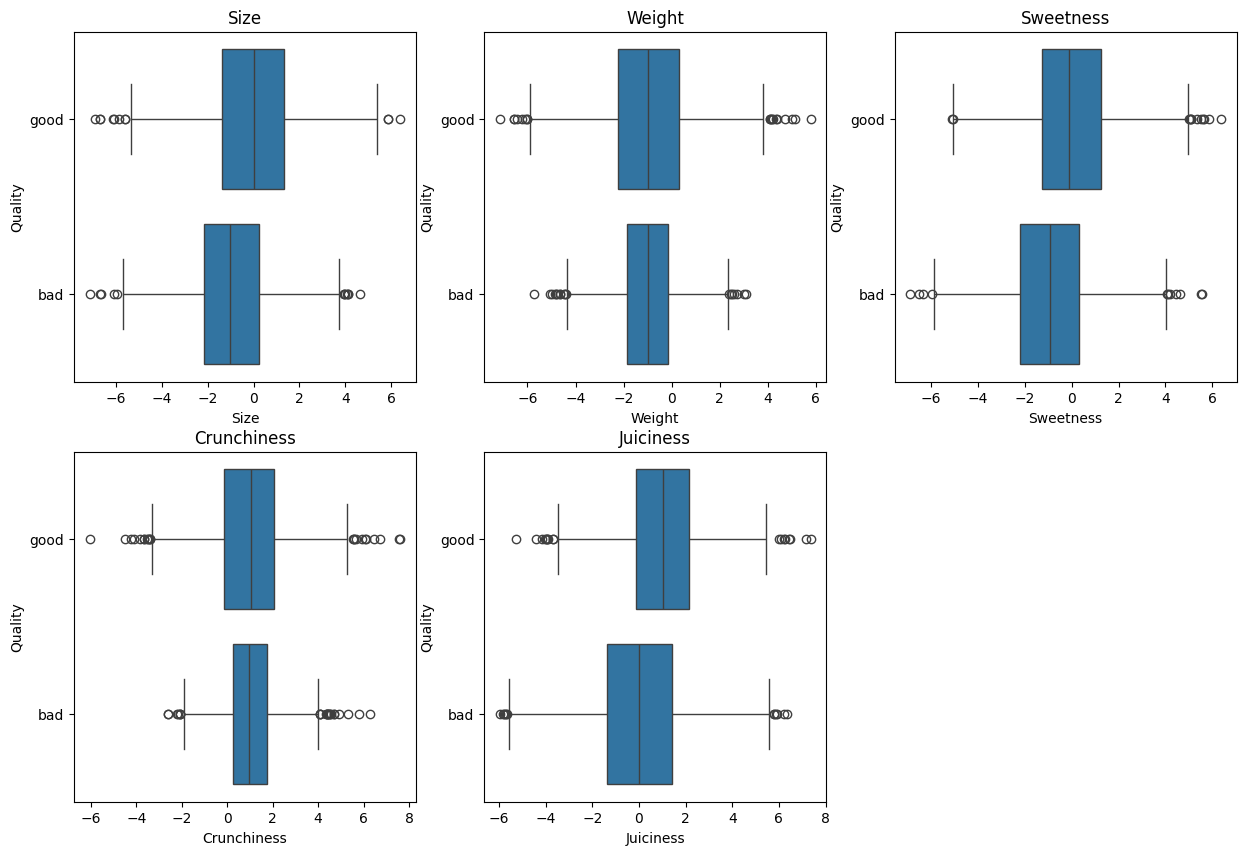

In [55]:
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y=target_variable, data=data)
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

plt.show()


На основе этих графиков можно сделать следующие выводы: 
1. Size (Размер): 
 
    Описание распределения: Медианы и межквартильные диапазоны (box) для категорий good и bad имеют значительное перекрытие. Это говорит о том, что значения Size не сильно различаются между яблоками хорошего и плохого качества. 
    Выбросы: В обеих категориях присутствуют выбросы, которые показывают экстремальные значения размера. 
    Вывод: Различие между good и bad незначительное, поэтому использование Size как предиктора для прогнозирования Quality может быть малоэффективным. 
 
2. Weight (Вес): 
 
    Описание распределения: Как и в случае с Size, медианы и межквартильные диапазоны для Weight перекрываются для категорий good и bad. Это говорит о том, что разница в весе между яблоками разного качества незначительна. 
    Выбросы: Выбросы присутствуют в обеих категориях, что указывает на наличие яблок с экстремально низким или высоким весом. 
    Вывод: Вес также не является хорошим предиктором для Quality, поскольку различия между good и bad в этой переменной незначительные. 
 
3. Sweetness (Сладость): 
 
    Описание распределения: Медианы для категорий good и bad немного различаются. Однако, несмотря на это, межквартильные диапазоны по-прежнему перекрываются, что указывает на присутствие значительного количества значений Sweetness, общих для обоих классов качества. 
    Выбросы: Наблюдаются выбросы в обеих категориях, что может указывать на отдельные яблоки с очень высокой или низкой сладостью. 
    Вывод: Переменная Sweetness показывает немного больше различий между good и bad по сравнению с Size и Weight, но эти различия все еще не достаточно выражены, чтобы уверенно прогнозировать Quality на основе Sweetness. 
 
4. Crunchiness (Хрусткость): 
 
    Описание распределения: График для Crunchiness также показывает некоторую разницу в медианах между good и bad, но межквартильные диапазоны перекрываются. Это указывает на то, что хрусткость яблок разных категорий качества не сильно различается. 
    Выбросы: Как и в предыдущих переменных, присутствуют выбросы, но их влияние несущественно для определения качества. 
    Вывод: Переменная Crunchiness не является достаточно различимой между good и bad, чтобы использовать её как единственный предиктор для Quality.
 
5. Juiciness (Сочность): 
 
    Описание распределения: Juiciness показывает наиболее выраженные различия между good и bad. Медианы для этих категорий заметно отличаются, и диапазон значений для good сдвинут по сравнению с bad. 
    Выбросы: Несмотря на выбросы, основное распределение значений Juiciness для категорий good и `bad различается, что может указывать на очень слабую связь сочности с качеством яблок. 
    Вывод: Juiciness является наиболее перспективной переменной для прогнозирования Quality, но недостаточно для того чтобы прогнозировать по ней. 
 

## 9 Посмотрите на зависимость двух переменных одновременно от целевой переменной

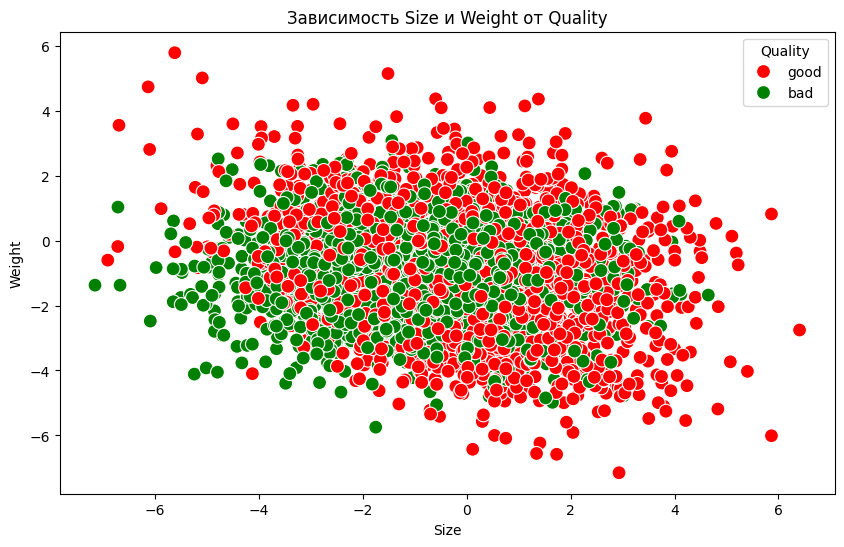

In [56]:

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=data, x='Size', y='Weight', hue='Quality', palette=['red', 'green'], s=100) 
plt.title("Зависимость Size и Weight от Quality") 
plt.xlabel("Size") 
plt.ylabel("Weight") 
plt.legend(title='Quality') 
plt.show()